In [1]:
from load import WatermarkDataset
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np
import torch
import cv2
from tqdm.notebook import tqdm
from torchvision.transforms import transforms

yolo_dataset has len: 9788, loader: 9788
idx 8419: 13067.jpg, img_size: torch.Size([3, 350, 525]), bounding_box (y1, y2, x1, x2): [ 55 122 280 493], resized_bbox: [ 40  89 136 240]
in test_load.ipynb: y1, y2, x1, x2: (40, 89, 136, 240)
Rectangle(xy=(136, 40), width=104, height=49, angle=0)


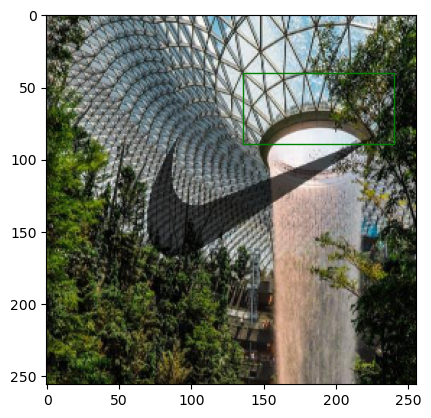

idx 323: 412.jpg, img_size: torch.Size([3, 350, 280]), bounding_box (y1, y2, x1, x2): [ 23  14 305 265], resized_bbox: [ 16  10 278 242]
in test_load.ipynb: y1, y2, x1, x2: (16, 10, 278, 242)
Rectangle(xy=(278, 16), width=-36, height=-6, angle=0)


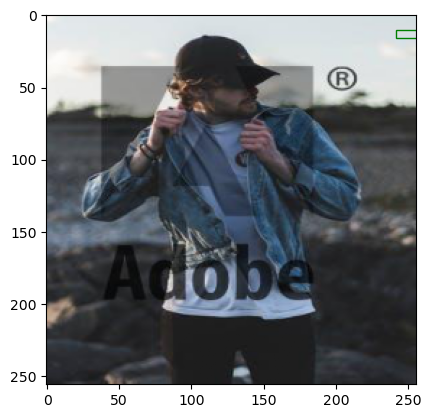

idx 7239: 11468.jpg, img_size: torch.Size([3, 350, 526]), bounding_box (y1, y2, x1, x2): [105  95 235 407], resized_bbox: [ 76  69 114 198]
in test_load.ipynb: y1, y2, x1, x2: (76, 69, 114, 198)
Rectangle(xy=(114, 76), width=84, height=-7, angle=0)


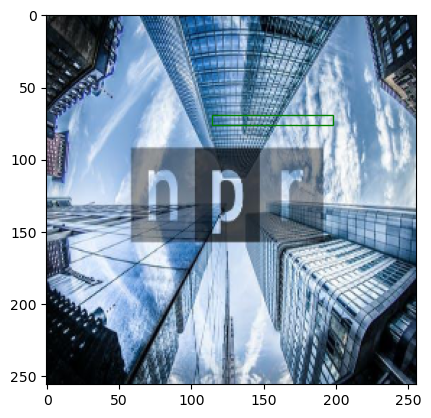

idx 9062: 14151.jpg, img_size: torch.Size([3, 350, 520]), bounding_box (y1, y2, x1, x2): [ 50 118 288 402], resized_bbox: [ 36  86 141 197]
in test_load.ipynb: y1, y2, x1, x2: (36, 86, 141, 197)
Rectangle(xy=(141, 36), width=56, height=50, angle=0)


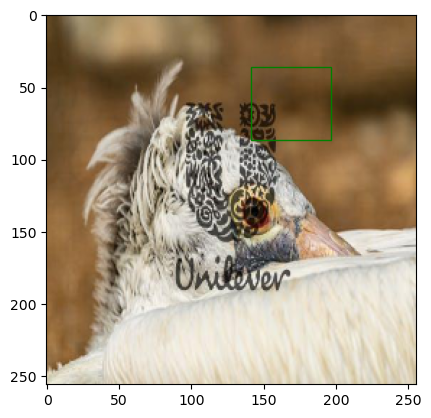

idx 2860: 4156.jpg, img_size: torch.Size([3, 350, 525]), bounding_box (y1, y2, x1, x2): [114 138 294 464], resized_bbox: [ 83 100 143 226]
in test_load.ipynb: y1, y2, x1, x2: (83, 100, 143, 226)
Rectangle(xy=(143, 83), width=83, height=17, angle=0)


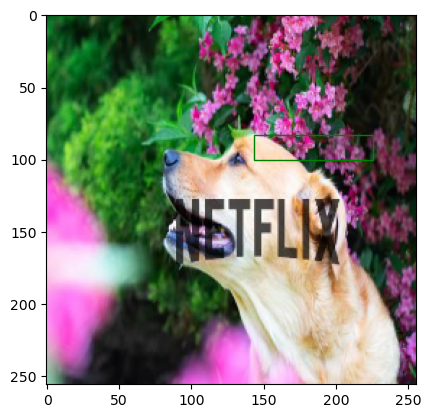

idx 5788: 9238.jpg, img_size: torch.Size([3, 350, 525]), bounding_box (y1, y2, x1, x2): [ 67 132 239 375], resized_bbox: [ 49  96 116 182]
in test_load.ipynb: y1, y2, x1, x2: (49, 96, 116, 182)
Rectangle(xy=(116, 49), width=66, height=47, angle=0)


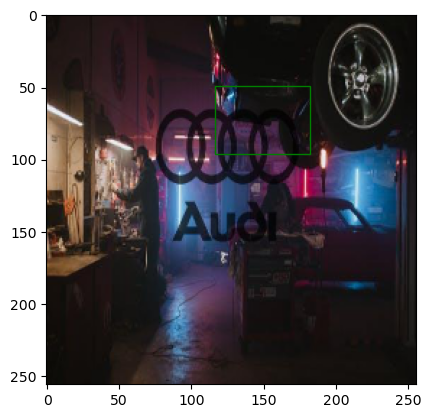

idx 5738: 9143.jpg, img_size: torch.Size([3, 350, 338]), bounding_box (y1, y2, x1, x2): [119  49 303 320], resized_bbox: [ 87  35 229 242]
in test_load.ipynb: y1, y2, x1, x2: (87, 35, 229, 242)
Rectangle(xy=(229, 87), width=13, height=-52, angle=0)


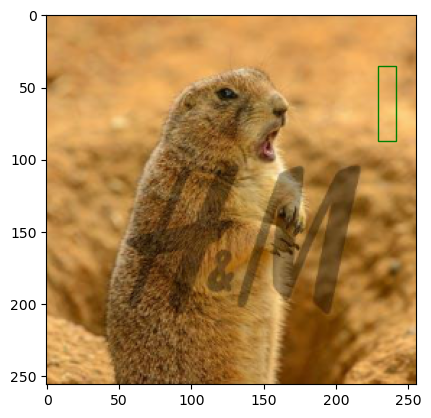

In [3]:
yolo_dataset = WatermarkDataset('logos_rendered', WatermarkDataset.YOLO_MODE)
yolo_loader = torch.utils.data.DataLoader(yolo_dataset, batch_size = 1, shuffle=True)
print(f'yolo_dataset has len: {len(yolo_dataset)}, loader: {len(yolo_loader)}')#

# practice loading and plotting bounding boxes on watermarked images
count = 0
for idx, (full_wm_img, target) in enumerate(yolo_loader):
    # Extract the bounding box coordinates
    y1, y2, x1, x2 = target[0].cpu().numpy()
    print(f'in test_load.ipynb: y1, y2, x1, x2: {(y1, y2, x1, x2)}')

    # Display the watermarked image
    full_wm_img = full_wm_img[0]
    fig, ax = plt.subplots(1)
    ax.imshow(np.moveaxis(full_wm_img.cpu().numpy(), (0, 1, 2), (2, 0, 1)))

    # Create a rectangle object with the bounding box coordinates
    # anchor is the bottom left point in the box
    anchor = (x1, y1)
    width, height = x2 - x1, y2 - y1
    rect = patches.Rectangle(anchor, width, height, linewidth=1, edgecolor='g', facecolor='none')
    print(rect)

    # Add the rectangle to the plot
    ax.add_patch(rect)

    # Show the plot
    plt.show()

    count += 1
    if count >= 7:
        break


0 [160  89 332 332]
1000 [101 325 285 596]
2000 [ 81 151 229 362]
3000 [ 37 120 306 376]
4000 [124 111 264 397]
5000 [ 76 116 262 337]
6000 [ 34  95 164 407]


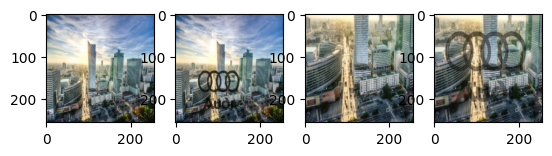

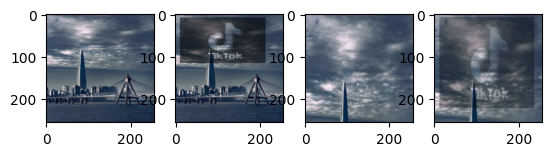

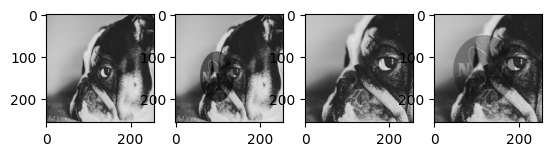

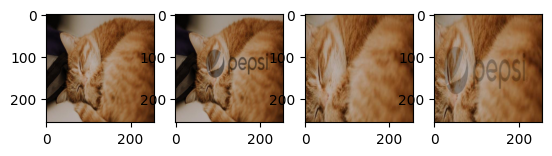

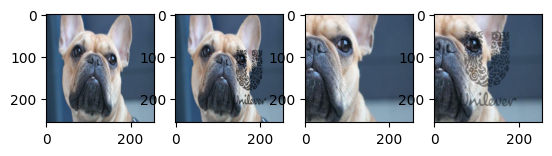

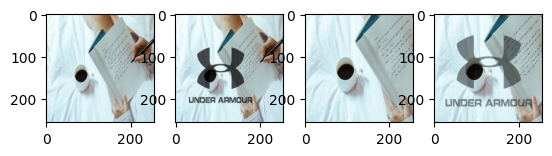

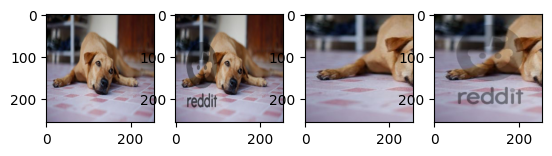

In [27]:
dataset = WatermarkDataset('logos_rendered', tuple(True for _ in range(5)))

for idx, data in enumerate(dataset):
    bb = data[-1]
    if idx % 1000 == 0:
        print(idx, bb)
        fig, axs = plt.subplots(1, 4)
        for im, ax in zip(data[:-1], axs):
            ax.imshow(np.moveaxis(im.cpu().numpy(), (0, 1, 2), (2, 0, 1)))

In [3]:
dataset = WatermarkDataset('logos_rendered', WatermarkDataset.CNN_MODE)
loader = torch.utils.data.DataLoader(dataset, batch_size = 1, shuffle=True)

In [5]:
for epoch in range(1):
    epoch_loss = 0
    for j, (nwm, wm) in enumerate(loader):
        print(len(nwm))
        print((nwm.shape))
        break
        

1
torch.Size([1, 3, 256, 256])


c:\Users\traep\anaconda3\envs\Advanced_ML\lib\site-packages\torchvision\transforms\functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(


torch.Size([3, 256, 256])


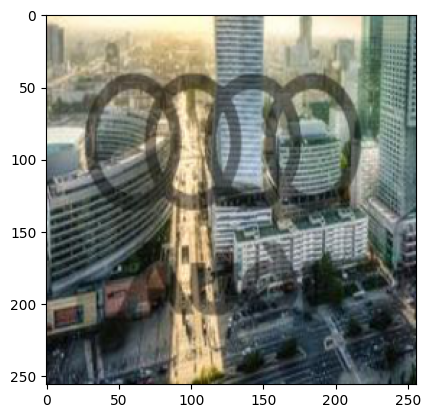

In [8]:
for idx, data in enumerate(dataset):
    bb = data[-1]
    if idx % 1000 == 0:
        print(bb.shape)
        plt.imshow(np.moveaxis(bb.cpu().numpy(), (0, 1, 2), (2, 0, 1)))
        plt.show()
        break

In [5]:
print(WatermarkDataset.CNN_MODE)

(False, False, True, True, True, False)
